In [1]:
import fredapi
from fredapi import Fred
import yfinance as yf
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from dotenv import load_dotenv
load_dotenv()

%matplotlib inline

In [2]:
# Pull US Treasury Yield data from Fred API
api_key = os.getenv('FRED_API_KEY')
fred = Fred(api_key=api_key)

In [4]:
# Pull Fed Funds Rate data
fed_funds_rate = fred.get_series('FEDFUNDS', observation_start='2010-01-01', observation_end='2022-10-01')
fed_funds_rate.tail()

2022-05-01    0.77
2022-06-01    1.21
2022-07-01    1.68
2022-08-01    2.33
2022-09-01    2.56
dtype: float64

In [17]:
# Pull S&P Index historical values from yfinance API
ticker = "^GSPC" 
start= "2010-01-01" 
end= "2022-10-02"

sp_history = yf.download(ticker, start=start, end=end, progress=False)
sp_history.to_csv('resources/sp_history.csv')
sp_history = sp_history.asfreq(freq='D').ffill().dropna()
sp_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-26,3682.719971,3715.669922,3644.760010,3655.040039,3655.040039,4.886140e+09
2022-09-27,3686.439941,3717.530029,3623.290039,3647.290039,3647.290039,4.577740e+09
2022-09-28,3651.939941,3736.739990,3640.610107,3719.040039,3719.040039,4.684850e+09
2022-09-29,3687.010010,3687.010010,3610.399902,3640.469971,3640.469971,4.681810e+09
2022-09-30,3633.479980,3671.439941,3584.129883,3585.620117,3585.620117,5.645360e+09


In [18]:
ffr_sp_df = pd.concat([sp_history['Adj Close'], fed_funds_rate], axis=1).dropna()
ffr_sp_df['FFR'] = ffr_sp_df[0]
ffr_sp_df = ffr_sp_df.drop(ffr_sp_df.filter(regex='0'), axis=1)
ffr_sp_df.tail()

,Adj Close,FFR
2022-05-01,4131.930176,0.77
2022-06-01,4101.229980,1.21
2022-07-01,3825.330078,1.68
2022-08-01,4118.629883,2.33
2022-09-01,3966.850098,2.56


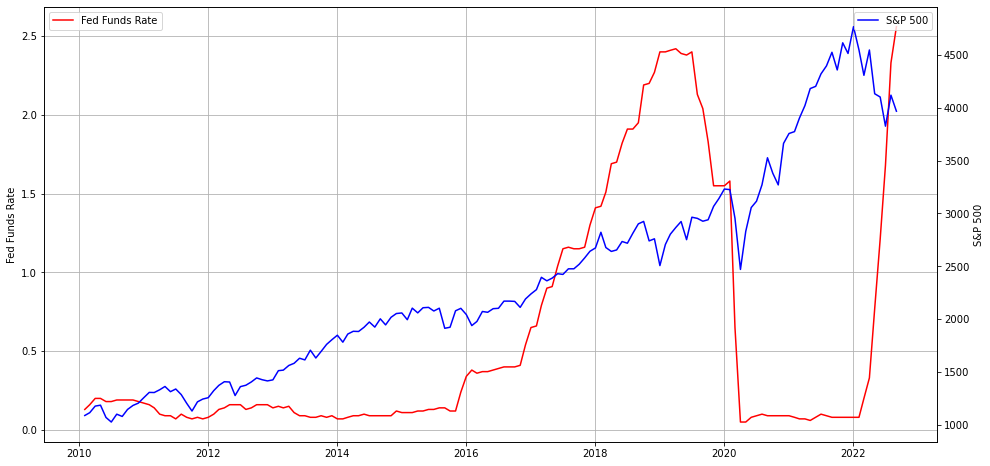

In [19]:
# Plot S&P 500 vs Fed Funds Rate
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(ffr_sp_df['FFR'], label ='Fed Funds Rate', color='r')
ax.set_ylabel('Fed Funds Rate')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(ffr_sp_df['Adj Close'], label ='S&P 500', color='b')
ax2.set_ylabel('S&P 500')
ax2.legend(loc='upper right')

In [20]:
# Correlation S&P 500 and Fed Fund Rate
stats.pearsonr(ffr_sp_df['Adj Close'], ffr_sp_df['FFR'])

(0.3132546045694964, 8.510490082483098e-05)

Text(0.5, 1.0, 'FFR vs S&P 500')

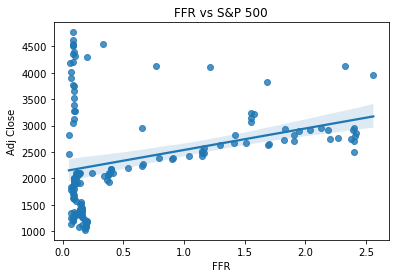

In [21]:
sns.regplot(data=ffr_sp_df, x='FFR', y='Adj Close')
plt.title('FFR vs S&P 500')

In [22]:
# Pull  historical values from yfinance API
ticker = "AGG" 
start= "2010-12-31" 
end= "2022-10-02"

agg_history = yf.download(ticker, start=start, end=end, progress=False)
agg_history = agg_history.asfreq(freq='D').ffill().dropna()
agg_history.to_csv('resources/agg_history.csv')
agg_history.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-26,96.870003,96.910004,95.870003,95.949997,95.739853,9009900.0
2022-09-27,95.970001,96.080002,95.379997,95.540001,95.330750,11440200.0
2022-09-28,96.470001,97.129997,96.269997,97.080002,96.867378,10539800.0
2022-09-29,96.480003,96.800003,96.290001,96.570000,96.358498,8666100.0
2022-09-30,96.860001,97.089996,96.190002,96.339996,96.128998,14376300.0


In [23]:
ffr_agg_df = pd.concat([agg_history['Adj Close'], fed_funds_rate], axis=1).dropna()
ffr_agg_df['FFR'] = ffr_agg_df[0]
ffr_agg_df = ffr_agg_df.drop(ffr_agg_df.filter(regex='0'), axis=1)
ffr_agg_df.tail()

,Adj Close,FFR
2022-05-01,101.690208,0.77
2022-06-01,102.042976,1.21
2022-07-01,101.713158,1.68
2022-08-01,103.791061,2.33
2022-09-01,99.850830,2.56


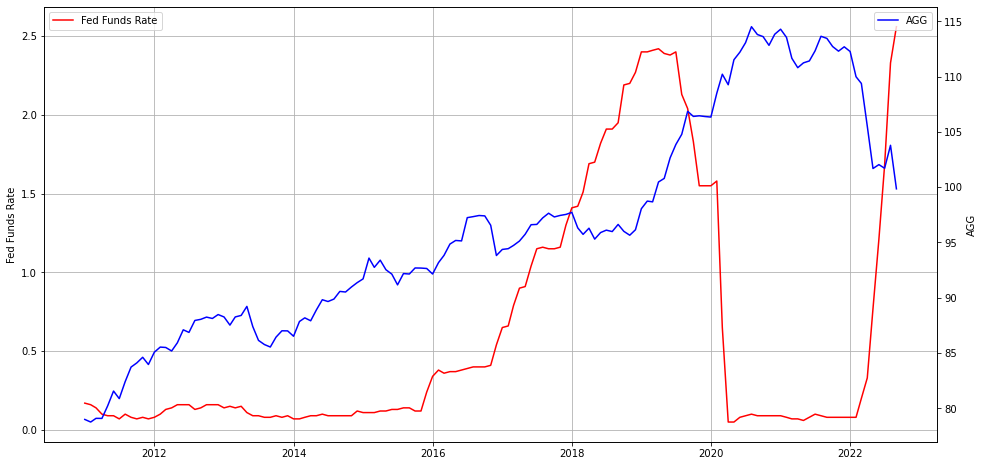

In [24]:
# Plot AGG vs Fed Funds Rate
fig, ax = plt.subplots(figsize=(16,8))
plt.plot(ffr_agg_df['FFR'], label ='Fed Funds Rate', color='r')
ax.set_ylabel('Fed Funds Rate')
plt.grid()
ax.legend(loc='upper left')

ax2 = ax.twinx()
plt.plot(ffr_agg_df['Adj Close'], label ='AGG', color='b')
ax2.set_ylabel('AGG')
ax2.legend(loc='upper right')

In [25]:
# Correlation AGG and Fed Fund Rate
stats.pearsonr(ffr_agg_df['Adj Close'], ffr_agg_df['FFR'])

(0.21392983370495217, 0.010858371439112188)

Text(0.5, 1.0, 'FFR vs AGG')

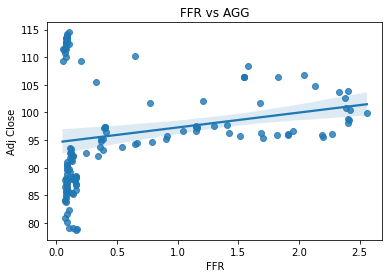

In [26]:
sns.regplot(data=ffr_agg_df, x='FFR', y='Adj Close')
plt.title('FFR vs AGG')